In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

import scipy as sp
import scipy.stats
import numpy as np

# Two Sample

(4387.8399703183522, 0.99999999999999989)

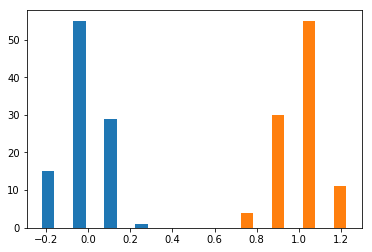

In [30]:
def anova_ex(sample_means, plot=True):
    N = 100
    std = 0.1
    samples = [np.random.normal(mu, std, N) for mu in sample_means] 

    if plot:
        plt.hist(samples)

    population = np.concatenate(samples)

    sample_means = np.array([np.mean(sample) for sample in samples])
    sample_sizes = np.array([len(sample) for sample in samples])

    mean_sqr_mean_diff = np.sum(sample_sizes * (sample_means - np.mean(population))**2)
    sum_of_sqr_err = np.sum([np.sum((sample - np.mean(sample))**2) for sample in samples])

    df1 = len(samples) - 1
    df2 = len(population) - len(samples)
    mean_diffs = mean_sqr_mean_diff / df1
    mean_sqr_err = sum_of_sqr_err / df2

    F = mean_diffs / mean_sqr_err
    return F, sp.stats.f.cdf(F, df1, df2)

anova_ex([0, 1])

(0.10635519238203248, 0.10086053669339833)

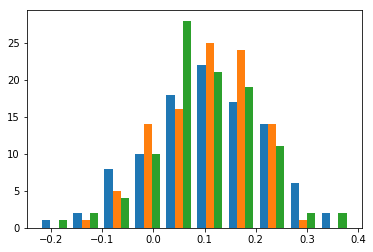

In [31]:
anova_ex([0.1, 0.1, 0.1])

(array([  104.,   202.,   307.,   413.,   504.,   606.,   704.,   801.,
          896.,  1000.]),
 array([  5.23934541e-04,   1.00274856e-01,   2.00025777e-01,
          2.99776698e-01,   3.99527619e-01,   4.99278540e-01,
          5.99029461e-01,   6.98780382e-01,   7.98531303e-01,
          8.98282224e-01,   9.98033145e-01]),
 <a list of 10 Patch objects>)

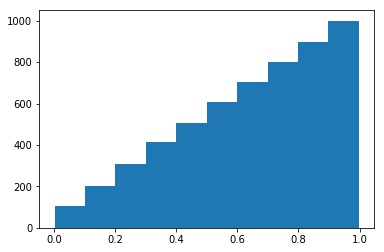

In [33]:
confidences = []
for _ in range(1000):
    confidences.append(anova_ex([0.1, 0.1, 0.1], plot=False)[1])
plt.hist(confidences, cumulative=True)

# F Statistic

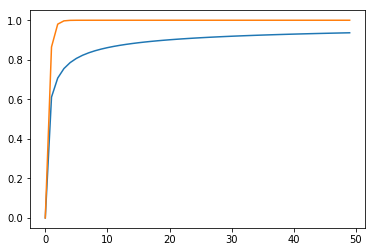

In [37]:
x = np.linspace(0, 100)

f_curves = np.array([sp.stats.f.cdf(x, df[0], df[1]) for df in [(1, 1), (2, 100)]])
plt.plot(f_curves.T)